In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Data= pd.read_csv('/content/gdrive/MyDrive/MSc Project/data_final.csv')

In [ ]:
# Data=Data.drop('Unnamed: 0',axis=1)
Data

,Trope,Description,FemaleTokens,MaleTokens,TotalMFTokens,Token_Labels
0,abandonedarea,abandoned places make good settings for fictio...,5.0,30.0,35.0,1
1,abandonedcatchphrase,catchphrases are a great and simple way to hel...,23.0,29.0,52.0,1
2,abandonedhospital,the creepy abandoned hospital/mental instituti...,23.0,40.0,63.0,1
3,abandonedmine,maybe there's nothing left to mine. maybe it w...,6.0,23.0,29.0,1
4,abandonedplayground,there's just something about the image of a pl...,16.0,24.0,40.0,1
...,...,...,...,...,...,...
1540,recountedbythemaincharacters,"sometimes, ""this is a true story"" is part of t...",109.0,728.0,837.0,1
1541,bythepowerofgreyskull,lots of phlebotinum is voice activated: kirk t...,178.0,966.0,1144.0,1
1542,crouchingniceguyhiddenjerkass,you meet someone you think is a really nice gu...,760.0,1003.0,1763.0,1
1543,narroweditdowntotheguyirecognise,big-name actors tend to get major roles in med...,583.0,2109.0,2692.0,1


In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 4.7 MB 24.2 MB/s 
     |████████████████████████████████| 1.3 MB 35.2 MB/s 
     |████████████████████████████████| 120 kB 59.1 MB/s 
     |████████████████████████████████| 6.6 MB 29.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=84d1fcf8eed4718e384d445096e8c02a2991fce7cba2518d4952cbdc49844bf4
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(Data['Description'], show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
embeddings

array([[-0.05030185, -0.2429269 ,  0.86764073, ..., -0.60891986,
         0.25385585, -0.18652564],
       [-0.19647615, -0.56955034,  0.6837895 , ..., -0.01479068,
        -0.22261281, -0.0313167 ],
       [ 0.1509335 , -0.4616585 ,  0.9761834 , ..., -0.41319346,
         0.37779075,  0.11005392],
       ...,
       [-0.09454142, -0.3418434 ,  1.0273983 , ..., -0.36505777,
        -0.05773334, -0.5733036 ],
       [ 0.02091983, -0.82802   ,  0.7687299 , ..., -0.21852809,
        -0.23810685, -1.4073832 ],
       [-0.20528175, -0.55486876,  0.6538243 , ..., -0.20150734,
         0.19645646, -0.33623528]], dtype=float32)

In [ ]:
Vectorized_data=pd.DataFrame(embeddings)
Vectorized_data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.050302,-0.242927,0.867641,-0.836809,-0.382324,-0.268555,-0.001526,-1.094172,0.087692,0.712702,...,-0.171416,-0.327049,0.080418,1.296808,0.414626,-0.119005,0.240614,-0.608920,0.253856,-0.186526
1,-0.196476,-0.569550,0.683789,-0.284566,-0.522853,-0.150279,0.346902,-1.427298,0.693567,0.739249,...,-0.792382,-0.408722,0.154100,1.122279,0.644240,-0.360838,0.061595,-0.014791,-0.222613,-0.031317
2,0.150934,-0.461659,0.976183,-1.092103,-0.711405,-0.312339,0.093346,-0.752022,-0.195754,0.032920,...,-0.076222,0.129213,-0.362630,0.353692,-0.185855,-0.417720,-0.320008,-0.413193,0.377791,0.110054
3,0.154751,-0.642553,0.337730,-0.812968,0.482777,-0.654876,0.182172,-0.644039,-0.296792,0.656474,...,0.216736,0.005755,0.475005,0.665345,0.377189,-0.260818,-0.023588,-0.281910,0.292931,-0.230037
4,-0.396571,-0.525519,0.461289,-0.502957,-0.362521,-0.029535,0.030131,-0.632614,-0.287424,0.953192,...,0.090270,0.248892,-0.139849,0.784303,0.845748,-0.706823,-0.374317,0.214207,0.167251,-0.002628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0.135308,-0.624231,1.072905,-0.005884,-0.226121,-0.647809,0.405201,-1.119786,0.520482,0.100493,...,-0.554772,-0.646419,0.269743,1.188639,0.521429,0.432424,-0.124450,-0.569651,0.140405,-1.022588
1541,-0.688201,-0.284255,0.707330,0.155485,-0.790992,-0.417988,0.180316,-0.671133,0.743605,0.441729,...,-0.789429,-0.256206,0.060645,0.350203,0.344775,0.079994,0.076478,-0.584914,0.127265,-0.321740
1542,-0.094541,-0.341843,1.027398,-0.669622,-0.572300,-0.027435,-0.518809,-0.836860,0.593544,0.522277,...,-0.809767,-0.265946,-0.291607,1.376457,0.262217,0.344805,0.032711,-0.365058,-0.057733,-0.573304
1543,0.020920,-0.828020,0.768730,-0.585322,-0.650127,-0.535017,0.069147,-1.156381,-0.204657,-0.062480,...,-1.045959,-0.700916,0.588761,0.198228,-0.336748,1.177883,-0.014212,-0.218528,-0.238107,-1.407383


In [ ]:
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(embeddings)

In [ ]:
from sklearn.metrics import pairwise_distances
pairwise_distance=pairwise_distances(standarized_data, metric='cosine')
pairwise_distance

array([[0.       , 0.8376378, 0.561736 , ..., 1.1358448, 1.1866941,
        0.9426343],
       [0.8376378, 0.       , 1.2995455, ..., 1.141795 , 1.1756711,
        0.8249966],
       [0.561736 , 1.2995455, 0.       , ..., 1.0857853, 1.1167397,
        1.2009389],
       ...,
       [1.1358448, 1.141795 , 1.0857853, ..., 0.       , 0.9616254,
        1.1019208],
       [1.1866941, 1.1756711, 1.1167397, ..., 0.9616254, 0.       ,
        1.2141101],
       [0.9426343, 0.8249966, 1.2009389, ..., 1.1019208, 1.2141101,
        0.       ]], dtype=float32)

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(perplexity=100)  #perplexity= number of neighborhood points
# X_embedded_BERT = tsne.fit_transform(pairwise_distance)
# X_embedded_BERT

In [ ]:
# X_embedded_BERT_load=pd.DataFrame(X_embedded_BERT)

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/MSc Project/X_embedded_BERT_load.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   X_embedded_BERT_load.to_csv(f)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
X_embedded_BERT_load=pd.read_csv('/content/gdrive/MyDrive/MSc Project/X_embedded_BERT_load.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X_embedded_BERT_load=X_embedded_BERT_load.drop('Unnamed: 0',axis=1)
X_embedded_BERT=np.asarray(X_embedded_BERT_load)
X_embedded_BERT

array([[-10.9751    ,   5.9116735 ],
       [-15.30481   ,  -5.3262234 ],
       [ -0.49943373,  14.948495  ],
       ...,
       [ 10.276411  , -11.081284  ],
       [ -1.4200935 ,  -9.307182  ],
       [ -7.434398  ,   1.5038761 ]])

Text(0, 0.5, 'Distance')

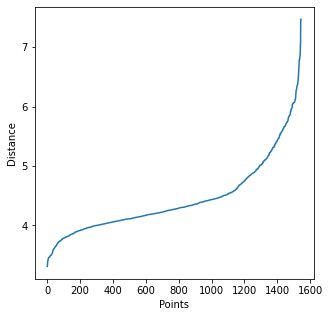

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

nearest_neighbors = NearestNeighbors(n_neighbors=100)
neighbors = nearest_neighbors.fit(X_embedded_BERT)

distances, indices = neighbors.kneighbors(X_embedded_BERT)
distances = np.sort(distances[:,99], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

4.811449137754233


<Figure size 360x360 with 0 Axes>

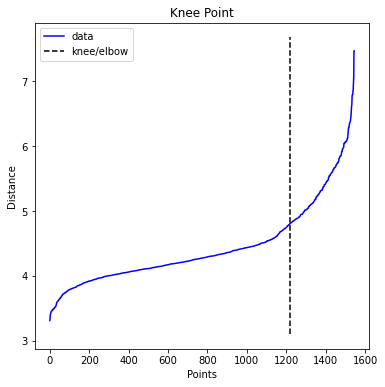

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])
Epsilon_Value=[]
Epsilon=distances[knee.knee]
Epsilon_Value.append(Epsilon)

In [ ]:
#Import DBSCAN library from sklearn.cluster
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_BERT)
cluster=clustering.labels_
cluster
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Noise=[]
Estimated_Clusters=[]
Estimated_Clusters_with_noise=[]
Estimated_Clusters.append(no_clusters_)
Estimated_Noise.append(no_noise)

Estimated number of clusters: 1
Estimated number of noise: 0


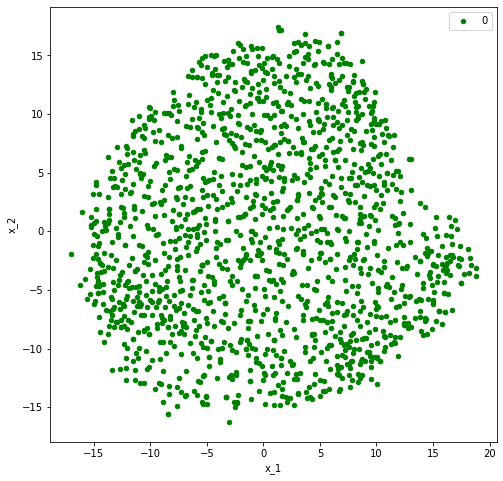

In [ ]:
def show_clusters(X_embedded, cluster):
  df = pd.DataFrame(dict(x=X_embedded[:,0], y=X_embedded[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue', 3:'yellow',4:'black',5:'orange',6:'brown',7:'pink'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_BERT, cluster)

In [ ]:
Silhouette_Score=[]
from sklearn import metrics
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
#print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_BERT, cluster))
Silhouette_Score.append(0)

1


In [ ]:
Epsilon=4.2
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_BERT)
cluster=clustering.labels_
cluster_main=cluster
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Noise.append(no_noise)

Estimated number of clusters: 2
Estimated number of noise: 68


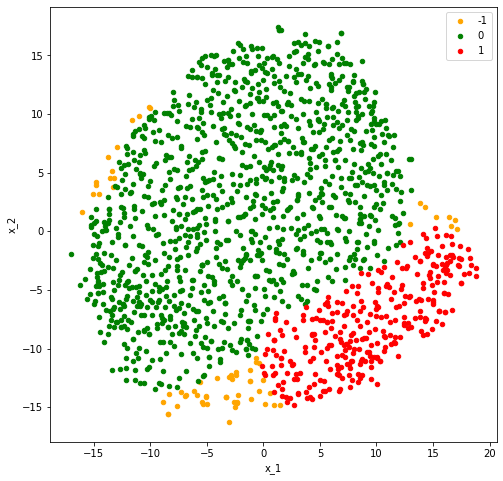

In [ ]:
def show_clusters(X_embedded, cluster):
  df = pd.DataFrame(dict(x=X_embedded[:,0], y=X_embedded[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'red'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_BERT, cluster)

In [ ]:
from sklearn import metrics
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_BERT, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_BERT, cluster))

2
Silhouette Coefficient: 0.199


In [ ]:
Epsilon=3.5
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_BERT)
cluster=clustering.labels_
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Noise.append(no_noise)

Estimated number of clusters: 2
Estimated number of noise: 1270


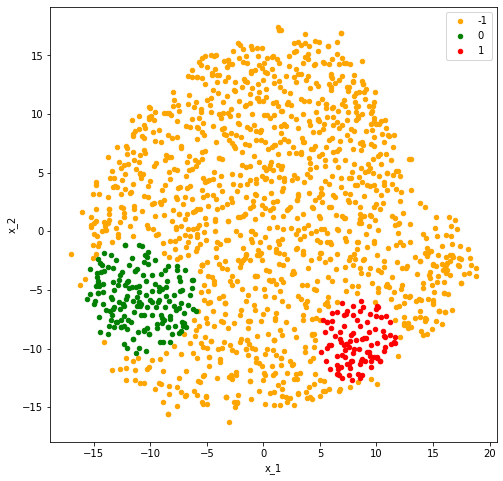

In [ ]:
def show_clusters(X_embedded, cluster):
  df = pd.DataFrame(dict(x=X_embedded[:,0], y=X_embedded[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'red', 2:'blue', 3:'yellow',4:'black',5:'orange',6:'brown',7:'pink'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_BERT, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_BERT, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_BERT, cluster))

2
Silhouette Coefficient: 0.029


In [ ]:
Epsilon=5
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_BERT)
cluster=clustering.labels_
cluster
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Noise.append(no_noise)

Estimated number of clusters: 1
Estimated number of noise: 0


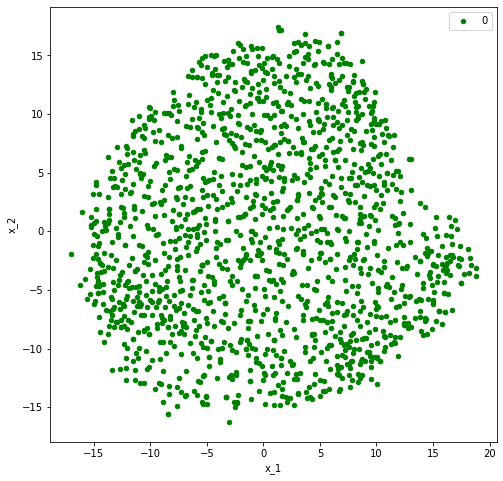

In [ ]:
def show_clusters(X_embedded, cluster):
  df = pd.DataFrame(dict(x=X_embedded[:,0], y=X_embedded[:,1], label=cluster))
  colors = {-1: 'orange', 0: 'green', 1:'blue', 2:'green', 3:'yellow',4:'black',5:'orange',6:'brown',7:'pink'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_BERT, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
#print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, cluster))
Silhouette_Score.append(0)

1


In [ ]:
data_count_BERT = {'Epsilon': Epsilon_Value,'Minimum Samples':[100,100,100,100],'Number of Clusters without Noise': Estimated_Clusters_with_noise,
                   'Number of Noise': Estimated_Noise,'Number of Clusters without Noise':Estimated_Clusters,'Silhouette Score':Silhouette_Score,'Number of Neighbors in KNN': [100,100,100,100]}
DBSCAN_Count_BERT = pd.DataFrame(data_count_BERT)
DBSCAN_Count_BERT

,Epsilon,Minimum Samples,Number of Clusters without Noise,Number of Noise,Silhouette Score,Number of Neighbors in KNN
0,4.811449,100,1,0,0.000000,100
1,4.200000,100,2,68,0.199252,100
2,3.500000,100,2,1270,0.029186,100
3,5.000000,100,1,0,0.000000,100


In [ ]:
#Compare the Male and Female Tokens and Assign 0 and 1 (Male=0 and Female =1)
conditions = [Data['FemaleTokens'] > Data['MaleTokens'], 
              Data['FemaleTokens'] < Data['MaleTokens']]
choices = ['1', '0']
Data['Token_Labels'] = np.select(conditions, choices, default='Noise')
Data_cluster_=Data.copy()
Data_cluster_['Cluster_Labels']=cluster_main
Data_cluster_.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Token_Labels,Cluster_Labels
0,abandonedarea,0,0
1,abandonedcatchphrase,0,0
2,abandonedhospital,0,0
3,abandonedmine,0,0
4,abandonedplayground,0,0
...,...,...,...
1540,recountedbythemaincharacters,0,0
1541,bythepowerofgreyskull,0,0
1542,crouchingniceguyhiddenjerkass,0,1
1543,narroweditdowntotheguyirecognise,0,0


In [ ]:
print(Data_cluster_['Token_Labels'].value_counts())
print(Data_cluster_['Cluster_Labels'].value_counts())

0        1361
1         181
Noise       3
Name: Token_Labels, dtype: int64
 0    1162
 1     315
-1      68
Name: Cluster_Labels, dtype: int64


In [ ]:
Data_cluster_1 = Data_cluster_[Data_cluster_.Cluster_Labels != -1]

In [ ]:
#female gendered tropes
Data_cluster_female = Data_cluster_1[Data_cluster_1.Cluster_Labels != 0]
Data_cluster_female.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
5,abandonedwarchild,1
9,abandonthedisabled,1
10,abbeyroadcrossing,1
12,abductionislove,1
15,abirthdaynotabreak,1
...,...,...
1517,thesixthranger,1
1519,archnemesismom,1
1521,wickedstepfather,1
1535,evilstepmother,1


In [ ]:
#male gendered tropes
Data_cluster_male = Data_cluster_1[Data_cluster_1.Cluster_Labels != 1]
Data_cluster_male.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
0,abandonedarea,0
1,abandonedcatchphrase,0
2,abandonedhospital,0
3,abandonedmine,0
4,abandonedplayground,0
...,...,...
1538,heroesofanotherstory,0
1540,recountedbythemaincharacters,0
1541,bythepowerofgreyskull,0
1543,narroweditdowntotheguyirecognise,0


In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 3.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340304 sha256=ee14ce893ccfb4dbbd13281d07477f5aaf56edf3eb1a0da5ae102b9ca11afeeb
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=100,min_samples=2).fit(X_embedded_BERT)
labels = clusterer.labels_
cluster_main=labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise=np.sum(np.array(labels)==-1,axis=0)
print('Estimated number of noise: %d' % n_noise)

Estimated number of clusters: 2
Estimated number of noise: 180


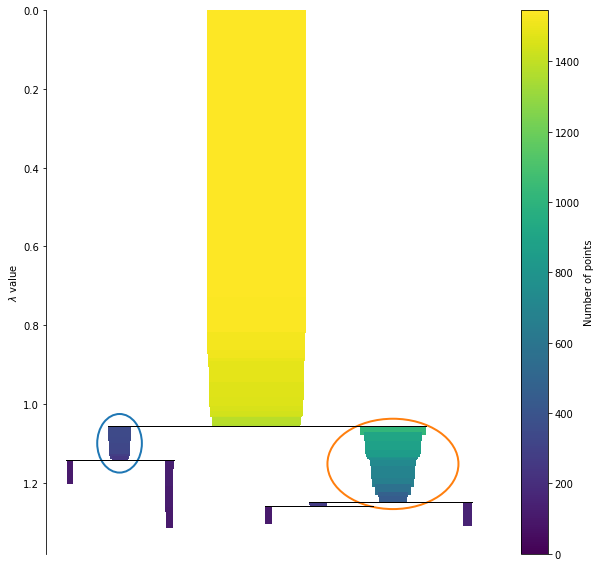

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show() 

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_BERT, labels))
Silhouette_Score.append(0)

2
Silhouette Coefficient: 0.153


In [ ]:
#Compare the Male and Female Tokens and Assign 0 and 1 (Male=0 and Female =1)
conditions = [Data['FemaleTokens'] > Data['MaleTokens'], 
              Data['FemaleTokens'] < Data['MaleTokens']]
choices = ['0', '1']
Data['Token_Labels'] = np.select(conditions, choices, default='Noise')
Data_cluster_=Data.copy()
Data_cluster_['Cluster_Labels']=cluster_main
Data_cluster_.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Token_Labels,Cluster_Labels
0,abandonedarea,1,-1
1,abandonedcatchphrase,1,1
2,abandonedhospital,1,1
3,abandonedmine,1,1
4,abandonedplayground,1,1
...,...,...,...
1540,recountedbythemaincharacters,1,1
1541,bythepowerofgreyskull,1,1
1542,crouchingniceguyhiddenjerkass,1,0
1543,narroweditdowntotheguyirecognise,1,0


In [ ]:
print(Data_cluster_['Token_Labels'].value_counts())
print(Data_cluster_['Cluster_Labels'].value_counts())

1        1361
0         181
Noise       3
Name: Token_Labels, dtype: int64
 1    1018
 0     347
-1     180
Name: Cluster_Labels, dtype: int64


In [ ]:
Data_cluster_1 = Data_cluster_[Data_cluster_.Cluster_Labels != -1]

In [ ]:
 #Male gendered tropes
Data_cluster_male = Data_cluster_1[Data_cluster_1.Cluster_Labels != 0]
Data_cluster_male.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
1,abandonedcatchphrase,1
2,abandonedhospital,1
3,abandonedmine,1
4,abandonedplayground,1
6,abandonedwarehouse,1
...,...,...
1537,metaphoricaltruth,1
1538,heroesofanotherstory,1
1540,recountedbythemaincharacters,1
1541,bythepowerofgreyskull,1


In [ ]:
#female gendered tropes
Data_cluster_female = Data_cluster_1[Data_cluster_1.Cluster_Labels != 1]
Data_cluster_female.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
5,abandonedwarchild,0
9,abandonthedisabled,0
10,abbeyroadcrossing,0
12,abductionislove,0
15,abirthdaynotabreak,0
...,...,...
1519,archnemesismom,0
1521,wickedstepfather,0
1535,evilstepmother,0
1542,crouchingniceguyhiddenjerkass,0
